# Importing necessary modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
data = pd.read_csv(r"E:\BCS\uber-raw-data-sep14.csv")
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)
data.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [43]:
data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["weekday"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)
print(data.head())

            Date/Time      Lat      Lon    Base  Day  weekday  Hour
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512    1        0     0
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512    1        0     0
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512    1        0     0
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512    1        0     0
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512    1        0     0


# plotting figure for day data

<AxesSubplot:xlabel='Day', ylabel='Count'>

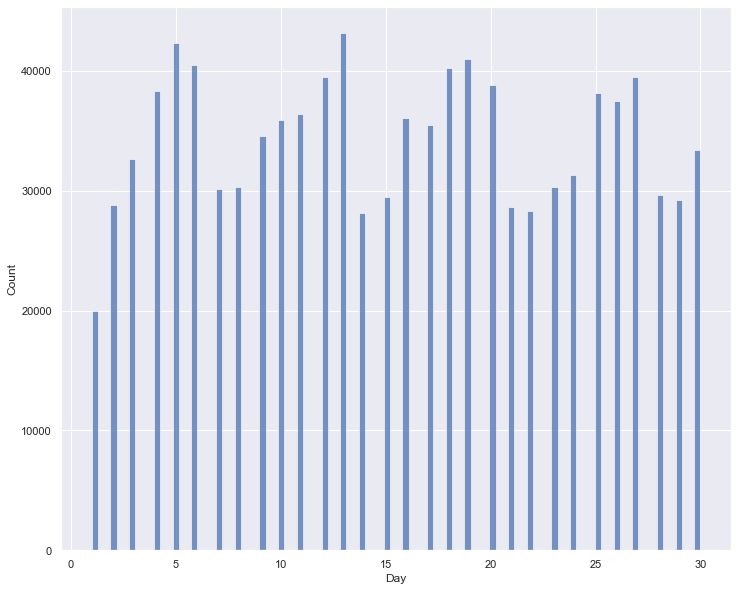

In [48]:
sns.set(rc={'figure.figsize':(12,10)})
sns.histplot(data["Day"])

C:\Users\Nihan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hour', ylabel='Density'>

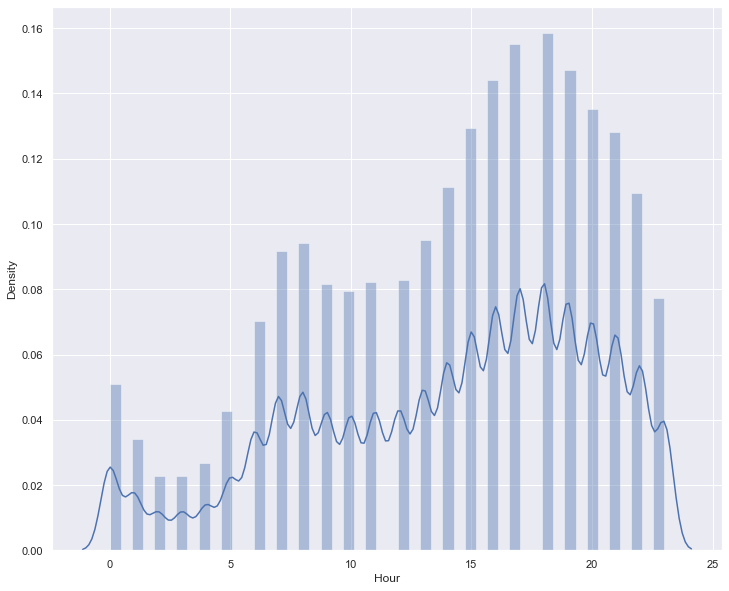

In [52]:
sns.distplot(data["Hour"])

<AxesSubplot:xlabel='weekday', ylabel='Count'>

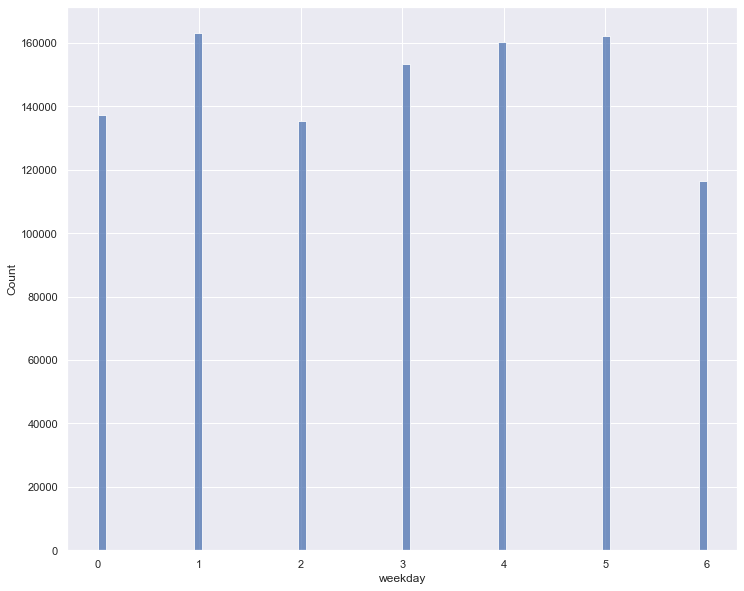

In [54]:
sns.histplot(data["weekday"])

# Co relation of weekday and hour

<AxesSubplot:xlabel='Hour', ylabel='weekday'>

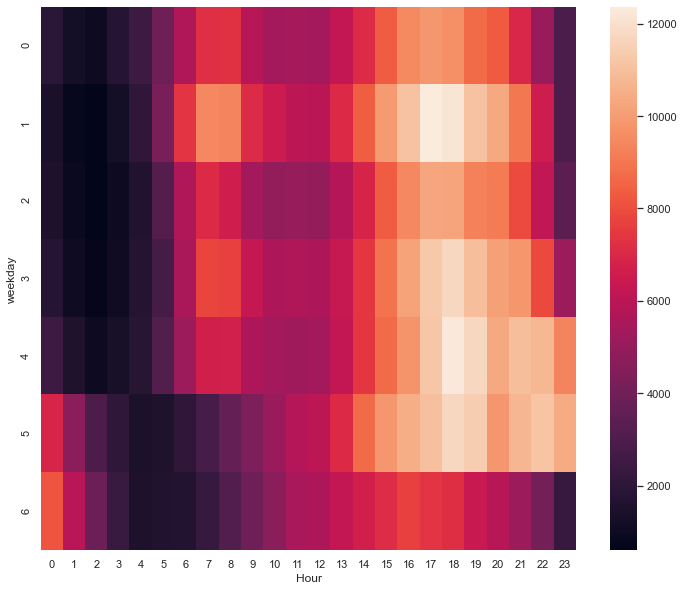

In [57]:
df = data.groupby(["weekday", "Hour"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


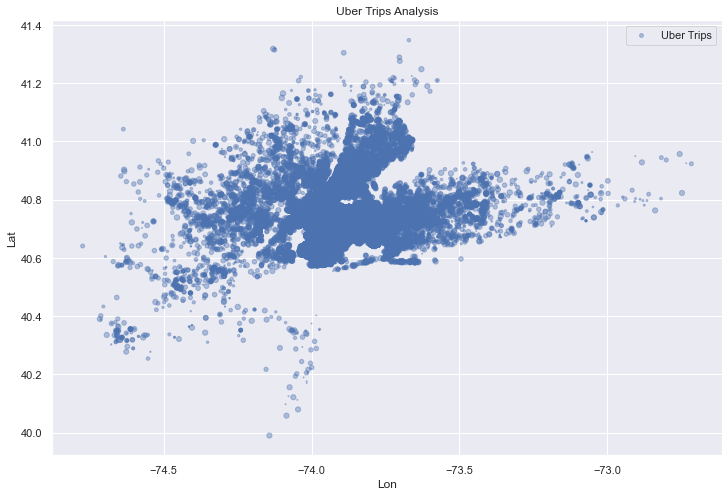

In [59]:
data.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=data['Day'], label='Uber Trips',figsize=(12, 8), cmap=plt.get_cmap('jet'))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()

In [ ]:
# Monday  is the most profitable day for uber
# on saturdays less number of people use uber
# 6 pm is the busiest day for uber
# on average uber trips start rising around 5 am
